In [1]:
# Import modules
import sys
import os
import pandas as pd

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


In [3]:
# Append the project root path to sys.path
sys.path.append(os.path.abspath("../scripts"))

In [4]:
# Import Custom Module
import Time_series_forcasting_models as tsfm

In [5]:
# Fetch and preprocess data
train, test = tsfm.fetch_and_preprocess_data('TSLA', '2015-01-01', '2025-01-31')

YF.download() has changed argument auto_adjust default to True



*********************100%***********************]  1 of 1 completed

In [6]:
# Display the first few rows of training data
train.head()

Ticker,TSLA
Date,
2015-01-02,14.620667
2015-01-05,14.006000
2015-01-06,14.085333
2015-01-07,14.063333
2015-01-08,14.041333


In [7]:
from statsmodels.tsa.stattools import adfuller

# Perform Augmented Dickey-Fuller test
result = adfuller(train)

# Extract the p-value
print('ADF Statistic:', result[0])
print('p-value:', result[1])

# Interpretation:
if result[1] <= 0.05:
    print("The series is likely stationary (reject the null hypothesis)")
else:
    print("The series is likely non-stationary (fail to reject the null hypothesis)")


ADF Statistic: -1.3071175481635393
p-value: 0.6259097682416385
The series is likely non-stationary (fail to reject the null hypothesis)


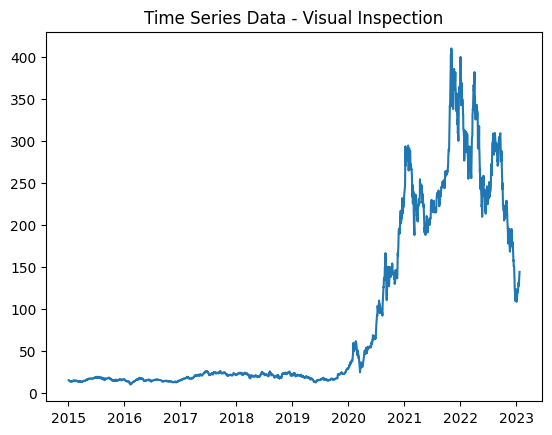

In [8]:
import matplotlib.pyplot as plt

# Plotting the time series data
plt.plot(train)
plt.title('Time Series Data - Visual Inspection')
plt.show()


In [9]:
# Train ARIMA model
arima_forecast, arima_model = tsfm.train_arima_model(train, test)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=12684.802, Time=0.81 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=12680.726, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=12679.653, Time=0.19 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=12679.753, Time=0.23 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=12678.997, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=12680.805, Time=0.76 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 2.116 seconds


C:\Users\HP\OneDrive\Desktop\ai2\kaim-week-11\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


ARIMA Model Evaluation:
MAE: 89.9096
RMSE: 111.0784
MAPE: 34.61%


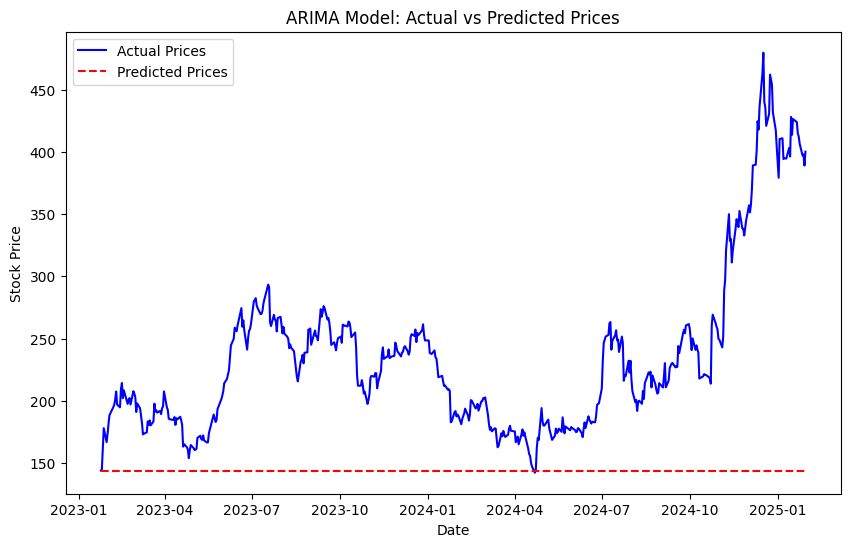

In [10]:
# Evaluate ARIMA model
tsfm.evaluate_model(test, arima_forecast, 'ARIMA')